<h1>Single Seasonal Time Series Anomaly Detection with Brutlag's Algorithm and Holt-Winter Exponential Smoothing</h1>
<hr style="border:2px solid gray"> </hr>
<h4> Tuan A. Le</h4>
<h4> Code Artefact</h4>
<br>(+84)858-575-001
<br>tle3006@gmail.com

<h3>Introduction</h3>

<font size="3" >
       One of the most profound types of studied data is time series data. Time series data can be found in any fields such as natural science, finance or engineering. There are consequently many different algorithms and methods built to tackle various types of problems in time series. This includes anomaly detection.

<br> The anomaly detection problem concerns the detection of outliers in time series data either historically or futuristically. The study presented is a simplified implementation version of a more complicated system applied in a company [3] in order to detect and alert business section about the potential and current threat/opportunities in operating.
        <br> The machine learning techniques usually used to solve the anomaly detection might be categorized into [1]:
            <ol>
                <li> <b>State space models</b> : exponential smoothing, Holt-Winters, ARIMA 
                <li> <b>Decomposition</b>: classical decomposition, STL 
                <li> <b>Deep learning</b>: recurrent neural networks 
                <li> <b>Dimensionality reduction</b>: RPCA, SOM, discords, piecewise linear
            </ol>
    <br> "In fact, according to *Statistical and Machine Learning forecasting methods: Concerns and ways forward* [5],  ETS outperforms several other ML methods including Long Short Term Memory (LTSM) and Recurrent Neural Networks (RNN) in One-Step Forecasting. Actually, all of the statistical methods have a lower prediction error than the ML methods do." [6] Advanced techniques might not always perform better than old methods like state space models. In case of single seasonal data, Holt-Winters or ARIMA is old but gold. Below is a comparison of ETS methods to other techniques in a case study [6]
</font>

<img src="wh vs others.jpg">

<font size="3" >
    <br> This study focuses on the State space models-<b>Holt-Winters Exponential Smoothing</b> to forecast future data that would then be compared to real observations. This is done along with taking into account the <b>Brutlag Algorithm</b>[2] to determine if the observation is an anomaly or not.
    <br> <b>The Brutlag Algorithm</b> [2] is an add-on of the Holt-Winters model in which a real observation is put within a band including 2 limits: an upperband and a lowerband. The observation is then determined if it is within (nomaly) or outside (anomaly) of the band.
    <br> One advantage of the method is that the Brutlag brand takes into account the seasonality, trend and level of the historical data to determine if an observation is an anomaly or not. It also gives us a visual "allowed" region for fluctuation to happen while let business anaylist decide how large the bandwidth is.
</font>

<h3>Theory</h3>

<font size="3" >
This section's mathematics notations follows [3]
<br>The general expression for a predicted value in Holt-Winter model can be shown as:
    <br> \begin{equation*} {\hat y}_{t} = L_{t-1} + P_{t-1} + S_{t-p} \tag{1} \end{equation*}
    <br> Where:
    <br> \begin{equation*} L_{t} = \alpha(y_{t} -S_{t-p})+(1-\alpha)(L_{t-1}+P_{t-p})  - Level\:component \tag{2} \end{equation*}
    <br> \begin{equation*} P_{t} = \beta(L_{t} -L_{t-1})+(1-\beta)P_{t-1}  - Trend/Slope\:component \tag{3} \end{equation*}
    <br> \begin{equation*} S_{t} = \gamma(y_{t}-L_{t}) + (1-\gamma)S_{t-p}  - Seasonality\:component \tag{4} \end{equation*}
<br> The <b>Brutlag agorithm</b> produce a confidence band to test if the forecasted/fitted datum within it or not. The band is characterized by:
    <br> \begin{equation*} {\hat y}_{max_{t}} = L_{t-1} + P_{t-1} + S_{t-p} + m.d_{t-p} \tag{5} \end{equation*}
    <br> \begin{equation*} {\hat y}_{min_{t}} = L_{t-1} + P_{t-1} + S_{t-p} - m.d_{t-p} \tag{6} \end{equation*}
<br> The $L_{t-1} + P_{t-1} + S_{t-p}$ can be considered as ${\hat y}_{t}$ component, and $d_{t-p}$ is the predicted deviation given by:
    <br> \begin{equation*} d_{t} = \gamma|y_{t}-{\hat y}_{t}| + (1-\gamma)d_{t-p} \tag{7} \end{equation*}
<br> From $(1)$,$(5)$,$(6)$ and $(7)$,we have:
     <br> \begin{equation*} {\hat y}_{max_{t}} = {\hat y}_{t} + m.(\gamma|y_{t-p}-{\hat y}_{t-p}| + (1-\gamma)d_{t-2p}) \tag{8} \end{equation*}
     <br> \begin{equation*} {\hat y}_{min_{t}} = {\hat y}_{t} - m.(\gamma|y_{t-p}-{\hat y}_{t-p}| + (1-\gamma)d_{t-2p}) \tag{9} \end{equation*}
<br>The parameters used:
    <uol>
        <li> $k$ number of measurements in time series
        <li> $t$ moment in time
        <li> ${\hat y}_{t}$ predicted value of variable at moment $t$
        <li> $y_{t}$ the real measured observation in moment $t$
        <li> $p$ time series period
        <li> $\alpha$ data smoothing factor
        <li> $\beta$ trend smoothing factor
        <li> $\gamma$ seasonal change smoothing factor
        <li> $m$ scaling factor for Brutlag confidence band
    </uol>
</font>

<font size="3" >
Eqn. $(8)$ and $(9)$ tells us that 
the Brutlag bands are dependent on the training data 2 $T$ from the predicted point. This implies that we need at least 2 period cycles in trainning data to have an estimation of the band. Also, the seasonaility influence in the <b>Brutlag algorithm</b> implies that it works well with seasonal data.
</font>

<h3>The modelling</h3>

<font size="3" >
The dataset used is a monthly sales data of a company obtained from Kaggle [4]. We firstly import the needed libraries.
</font

<font size="2" >
**Note: In this study, the term "anomaly" and "outlier" are interchangably used**
</font

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(color_codes=True)
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters
%matplotlib inline
import os
import math
import scipy.stats as sps
from scipy.stats import zscore
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib as mpl
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Setup matplotlib and pandas display
pd.options.display.float_format = '{:,.3f}'.format
np.set_printoptions(3)
title_font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

In [3]:
#Import and preprocess data
sale = pd.read_csv('monthly_sale.csv')
sale.columns = sale.columns.str.lower()
sale.set_index('month',inplace=True)
sale.index = pd.to_datetime(sale.index)
# sale.index = pd.to_datetime(sale.index,format="%Y-%m")

<font size="3" >
In order to have a glance at and get some feelings about the data, we plot them.
</font>

Text(0, 0.5, 'Sales')

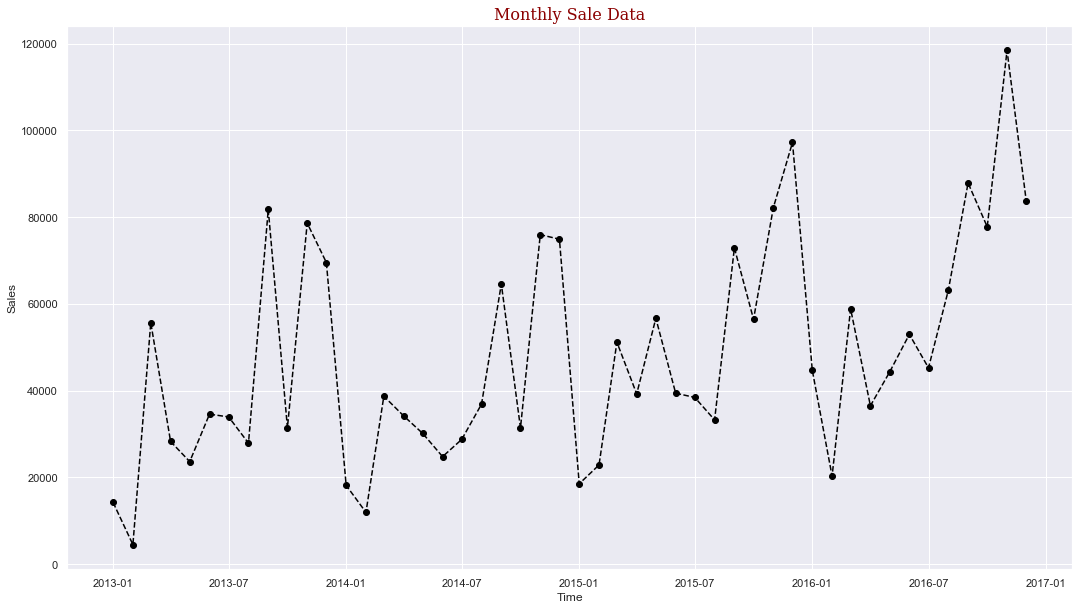

In [4]:
# Take a brief look at the data
plt.figure(figsize=(18,10))
plt.plot(sale['sales'],color='black',linestyle='dashed',marker='o',markerfacecolor='black',label='Testing Data')
plt.title(label='Monthly Sale Data', fontdict=title_font)
plt.xlabel('Time')
plt.ylabel('Sales')

<font size="3" >
We can briefly see the yearly seasonality and the overall increasing trend of the data. Although there are some fluctuation here and there, we may want to break the time series down into components to have a better picture of the time series behaviors.
</font>

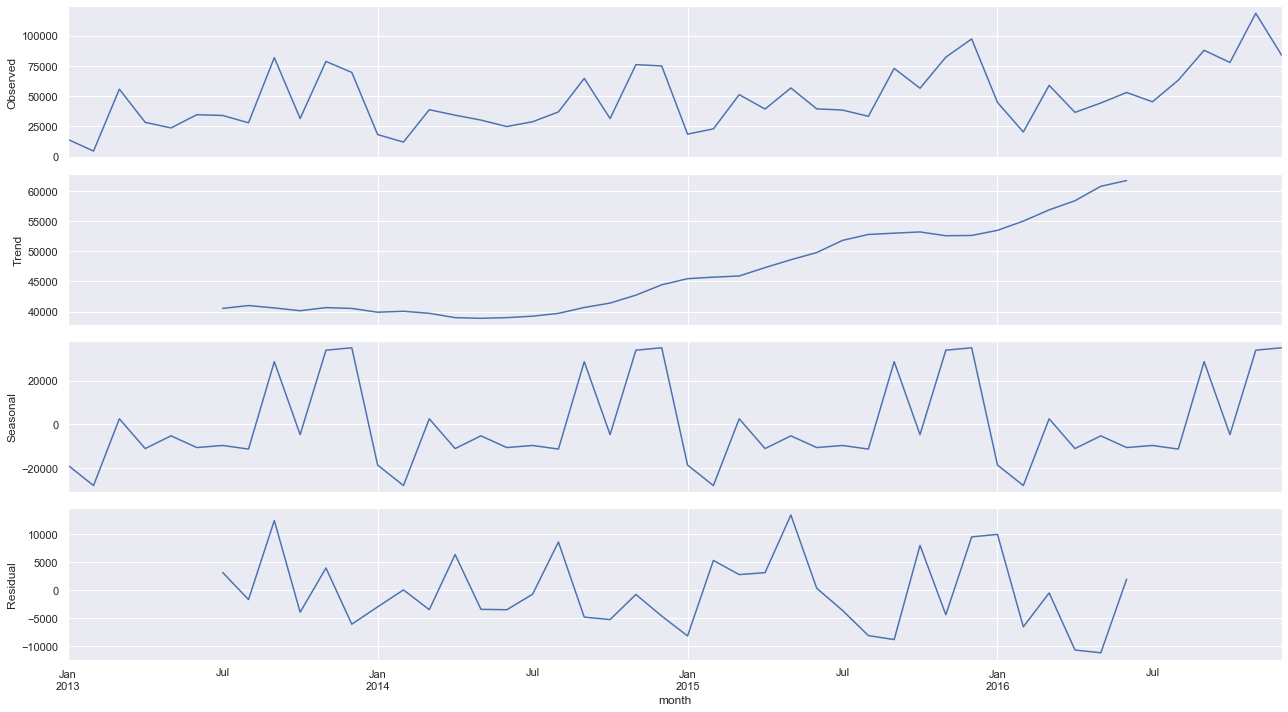

In [5]:
with mpl.rc_context():
    mpl.rc("figure", figsize=(18,10))
    seasonal_decompose(sale,model='additive',freq=12).plot()
    plt.show()

<font size="3" >
The overall trend appear clearer with the increasing almost monotonically. The seasonality appears with the peaks around August and October-November while the valleys are at about February. By comparing the residual and other components, it is clear that the fluctuation is not a minor factor.
<br> Pretending to be at the end of 2015, we want to build a model to forecast the sales in 2016 and determine if there are any anomalies in the sales in each month. We start with determining the train set and test set.
</font>

In [6]:
sale_train = sale[(sale.index<'2016-01-01')]
sale_test = sale[sale.index>='2016-01-01']

<font size="3" >
We then fit the Winter-Holt additive model with the training set
</font>

In [7]:
hw_fit = ExponentialSmoothing(sale_train,seasonal_periods=12,trend='additive',seasonal='additive').fit()

In [8]:
print(hw_fit.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    endog   No. Observations:                   36
Model:             ExponentialSmoothing   SSE                     2604444672.100
Optimized:                         True   AIC                            683.491
Trend:                         Additive   BIC                            708.827
Seasonal:                      Additive   AICC                           723.726
Seasonal Periods:                    12   Date:                 Tue, 11 Aug 2020
Box-Cox:                          False   Time:                         12:26:02
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.1578947                alpha                 True
smoothing_slope          

<font size="3" >
From the training set, the machine can "learn" the seasonality, trend and level of the time series. These factors are reflected from
the three parameters: $\alpha$, $\beta$, $\gamma$. One might want to cross validate the model using various permutations of the three factors to determine which set of parameters work best.
</font>

In [9]:
alpha = hw_fit.params['smoothing_level']
beta = hw_fit.params['smoothing_slope']
gamma = hw_fit.params['smoothing_seasonal']
period = 12

In [10]:
# The important parameters are then displayed
print('alpha: {}'.format(alpha), 'beta: {}'.format(beta), 'gamma: {}'.format(gamma),sep='\n')
print('aic: ', hw_fit.aic)

alpha: 0.15789473684210525
beta: 0.10526315789473684
gamma: 0.8421052631578947
aic:  683.4907894378435


<font size="3" >
The incremental timesteps values of $L_{t}$, $P_{t}$, $R_{t}$ (residual) and $S_{t}$ are also obtained from the fit. Since we consider
this is an additive model, we expect the fitted Winter-Holtz model for the trainning data is in the form of:
<br> \begin{equation*} {\hat y}_{t} = L_{t-1} + P_{t-1} + S_{t-T} + R_{t} \tag{10} \end{equation*}
</font>

In [11]:
L = hw_fit.level.to_frame('level')
S = hw_fit.season.to_frame('season')
P = hw_fit.slope.to_frame('slope')
R = hw_fit.resid.to_frame('resid')
hw_fit_param = S.join(L).join(P).join(R)
fitted_train = hw_fit_param.sum(axis=1).to_frame('prediction')
sale_train = sale_train.join(fitted_train)

<font size="3" >
Following equation $(10)$, we sum the factors up and make a plot of the fitted value on the real observations
</font>

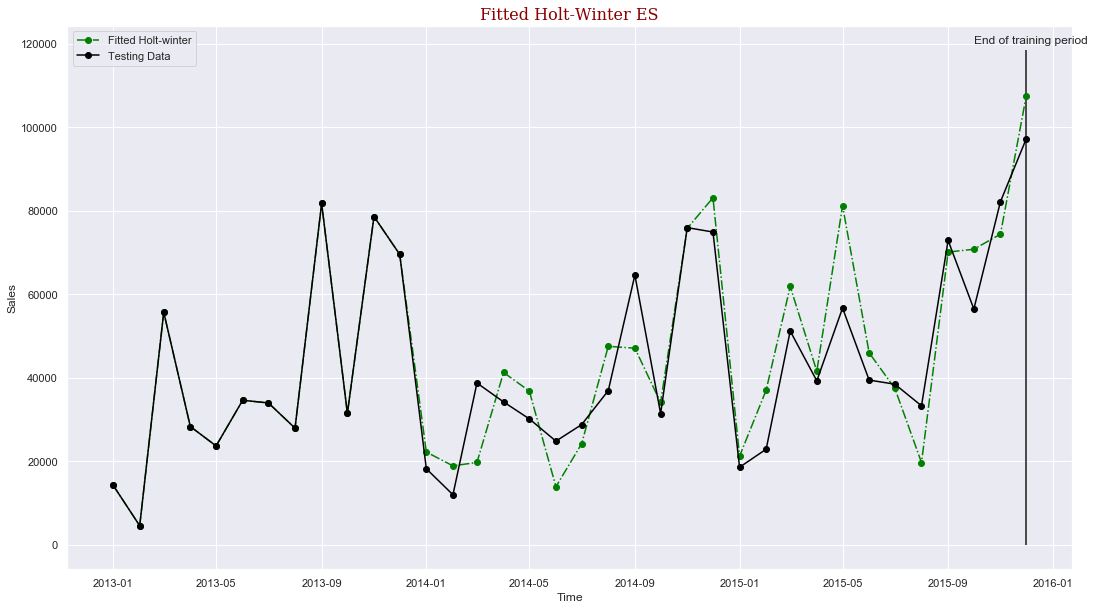

In [12]:
plt.figure(figsize=(18,10))
plt.plot(sale_train['prediction'],color='green',linestyle='dashdot',marker='o',markerfacecolor='green'
         ,label='Fitted Holt-winter')
plt.plot(sale_train['sales'],color='black',linestyle='solid',marker='o',markerfacecolor='black',label='Testing Data')

plt.vlines(sale_train.index[-1],ymin=0,ymax=sale['sales'].max())
plt.text(x=sale_train.index[-3],y=120000,s='End of training period',fontsize=12)
plt.title(label='Fitted Holt-Winter ES', fontdict=title_font)
plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend(loc='upper left')

<font size="3" >
The fitted values are a bit off after the $1^{st}$ period; however, the $3^{rd}$ period shows a better average of the learned information
from the previous 2. Since the sample data contains only 3 periods in the training phase, and eqn. $(8)$ and $(9)$ tells us that 
the Brutlafg bands are dependent on the training data 2T from the predicted period, we expect the longer the training data the better
the estimation for the bands. This is the result of giving the Holt-Winter model more time to adapt.
<br> We then move on to the prediction phase using the learned model.
<br>
<br> One of many beauties of Holt-Winter method is being able to forecast long period of time ahead. However, to minimize the possible error of low seasonal series, we should train the model frequently after obtaning new data points.
<br> We would like to illustrate the idea by predict 2 periods of the data ahead of time; however, in real run, we would expect to train the model on the go at least once per period.
</font>

In [13]:
# The length of the prediction is twice as that of the test data.
prediction = hw_fit.forecast(2*len(sale_test))
sale_test = sale_test.join(prediction.to_frame('prediction'),how='outer')

<font size="3" >
The fitted model and the prediction are then concatenated into a single dataframe. This is because the Brutlag bands calculation requires 2 periods before, which means we have to take advantage of the fitted models found on the previous step. Concatenating to form a single dataframe is just for coding convenience.
</font>

In [14]:
sale = pd.concat([sale_train,sale_test])

<font size="3" >
From eqn. $(5)$ and $(6)$, we have:
<br> \begin{equation*} {\hat y}_{max_{t}} = {\hat y}_{t} + m.d_{t-p} \tag{11} \end{equation*}
<br> \begin{equation*} {\hat y}_{min_{t}} = {\hat y}_{t} - m.d_{t-p} \tag{12} \end{equation*}
<br> To perform the calculation, we need to find $d_{t-p}$. ${\hat y}_{t}$ has been found on the previous steps.
<br> we break this into steps:
    <uol>
        <li> Find needed parameters (this has been done on the previous steps) <b>(step 0)</b>
        <li> Find $\gamma|y_{t}-{\hat y}_{t}|$ $(i)$ <b>(step 1)</b>
        <li> Shift the values in $(i)$ by a period to obtain $\gamma|y_{t-p}-{\hat y}_{t-p}|$ $(ii)$ <b>(step 2)</b>
        <li> From (i) we get $d_{t} = (i) + (1-\gamma)(ii)$ (The values of $(ii)$ in the first period would be 0, however, they do not interfere much with the bands calculation since they are 3 periods behind) <b>(step 3)</b>
        <li> Shift $d_{t}$ from step 3 1 more period to obtain $d_{t-p}$ <b>(step 4)</b>
        <li> Give an arbitrary scaling factor $m$ (should be between 2 and 3 [2]) and perform equation $(5)$ and $(6)$ with $d_{t-p}$ to obtain ${\hat y}_{max_{t}}$ and ${\hat y}_{min_{t}}$. The choice of $m$ reflects the tolerance towards the anomalies <b>(step 5)</b>
        <li> Compare each value of the real observations to the upperbound and lowerbound to determine if it is and anomaly or not. <b>(step 6)</b>
    </uol>
</font>

In [15]:
#Step 1:
sale['dt'] = gamma*abs(sale['sales']-sale['prediction'])

In [16]:
# step 2:
sale['shifted_dt'] = sale['dt'].shift(period)

In [17]:
# step 3:
sale['dt'] = (sale['dt'] + (1-gamma)*sale['shifted_dt'])

In [18]:
# step 4:
sale['dt'] = sale['dt'].shift(period)

In [19]:
# step 5:
sale_test = sale_test.join(sale['dt'],how='left')
m = 2
sale_test['ub'] = sale_test['prediction'] + sale_test['dt']*m
sale_test['lb'] = sale_test['prediction'] - sale_test['dt']*m

In [20]:
# step 6:
sale_test_outliners = sale_test[((sale_test['sales']>sale_test['ub'])|(sale_test['sales']<sale_test['lb']))]
display(sale_test_outliners)

,sales,prediction,dt,ub,lb
2016-01-01,"44,703.140","33,377.225","2,758.429","38,894.082","27,860.368"
2016-04-01,"36,521.540","51,837.239","2,877.469","57,592.176","46,082.301"
2016-11-01,"118,447.830","93,134.738","6,583.860","106,302.457","79,967.018"


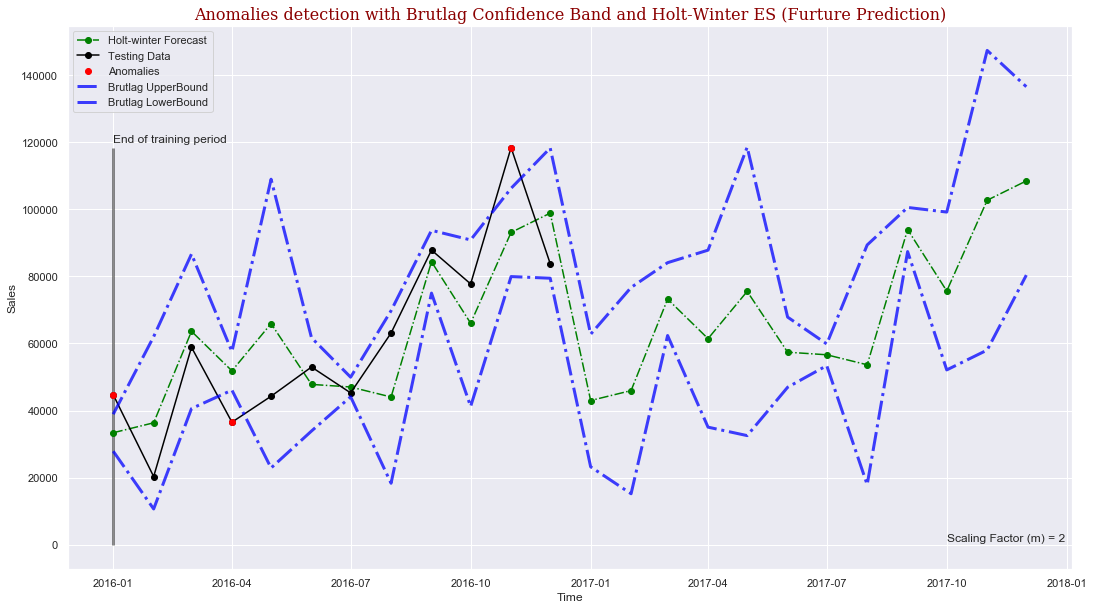

In [21]:
plt.figure(figsize=(18,10))
plt.plot(sale_test['prediction'],color='green',linestyle='dashdot',marker='o',markerfacecolor='green',
         label='Holt-winter Forecast')
plt.plot(sale_test['sales'],color='black',linestyle='solid',
         marker='o',markerfacecolor='black',label='Testing Data')
plt.plot(sale_test_outliners['sales'],'o',markerfacecolor='red',
         label='Anomalies',markeredgecolor='red')

plt.plot(sale_test['ub'],linestyle='dashdot',color='blue',label='Brutlag UpperBound',alpha=0.75
         ,solid_capstyle='round',solid_joinstyle='round',linewidth=3)
plt.plot(sale_test['lb'],linestyle='dashdot',color='blue',label='Brutlag LowerBound',alpha=0.75
        ,solid_capstyle='round',solid_joinstyle='round',linewidth=3)

plt.vlines(sale_test.index[0],ymin=0,ymax=sale['sales'].max(),linewidth=3,alpha=0.5)
plt.text(x=sale_test.index[0],y=120000,s='End of training period',fontsize=12)
plt.text(x=sale.index[-3],y=1000,s='Scaling Factor (m) = 2',fontsize=12)
plt.title(label='Anomalies detection with Brutlag Confidence Band and Holt-Winter ES (Furture Prediction)', fontdict=title_font)
plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend(loc='upper left')

<font size='3'>
The result and the trainning portion are then shown on a single plot
</font>

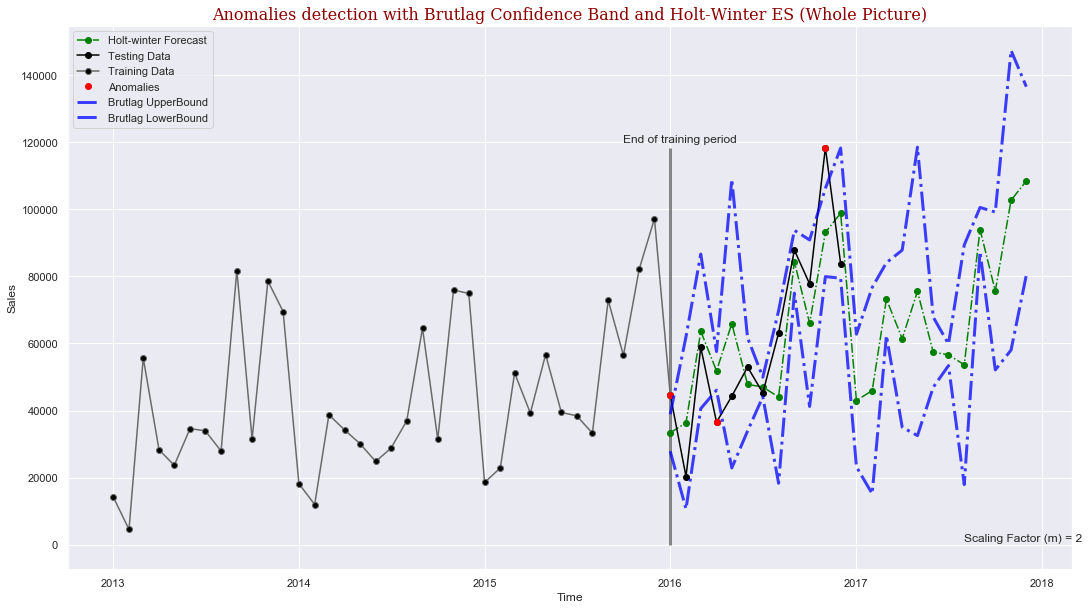

In [22]:
plt.figure(figsize=(18,10))
plt.plot(sale_test['prediction'],color='green',linestyle='dashdot',marker='o',markerfacecolor='green',
         label='Holt-winter Forecast')
plt.plot(sale_test['sales'],color='black',linestyle='solid',
         marker='o',markerfacecolor='black',label='Testing Data')
plt.plot(sale.loc[:sale_test.index[0]]['sales'],color='dimgray',
         linestyle='solid',marker='o',markerfacecolor='black',label='Training Data')
plt.plot(sale_test_outliners['sales'],'o',markerfacecolor='red',
         label='Anomalies',markeredgecolor='red')


plt.plot(sale_test['ub'],linestyle='dashdot',color='blue',label='Brutlag UpperBound',alpha=0.75
         ,solid_capstyle='round',solid_joinstyle='round',linewidth=3)
plt.plot(sale_test['lb'],linestyle='dashdot',color='blue',label='Brutlag LowerBound',alpha=0.75
        ,solid_capstyle='round',solid_joinstyle='round',linewidth=3)

plt.vlines(sale_test.index[0],ymin=0,ymax=sale['sales'].max(),linewidth=3,alpha=0.5)
plt.text(x=sale_train.index[-3],y=120000,s='End of training period',fontsize=12)
plt.text(x=sale.index[-5],y=1000,s='Scaling Factor (m) = 2',fontsize=12)
plt.title(label='Anomalies detection with Brutlag Confidence Band and Holt-Winter ES (Whole Picture)', fontdict=title_font)
plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend(loc='upper left')

<h3> Assessment </h3>

<font size='3'>
After the result being plotted, we will examine the detected1 outliers to assess the accuracy of our model.
<br>We first show the outliners in 2016
</font>

In [23]:
sale_test_outliners

,sales,prediction,dt,ub,lb
2016-01-01,"44,703.140","33,377.225","2,758.429","38,894.082","27,860.368"
2016-04-01,"36,521.540","51,837.239","2,877.469","57,592.176","46,082.301"
2016-11-01,"118,447.830","93,134.738","6,583.860","106,302.457","79,967.018"


<font size='3'>
We then put the detected outliners with other data points
</font>

In [24]:
sale_compare=sale[sale.index.strftime('%m').isin(sale_test_outliners.index.strftime("%m"))].dropna(subset=['sales'])[['sales']]
sale_compare.loc[:,'month'] = sale_compare.index.strftime("%m")
sale_compare.sort_values(by='month')

,sales,month
2013-01-01,"14,236.900",01
2014-01-01,"18,174.080",01
2015-01-01,"18,542.490",01
2016-01-01,"44,703.140",01
2013-04-01,"28,295.350",04
2014-04-01,"34,195.210",04
2015-04-01,"39,248.590",04
2016-04-01,"36,521.540",04
2013-11-01,"78,628.720",11
2014-11-01,"75,972.560",11


<font size='3'>
To check if these points are outliners or not, there are two scenarios they might be categorized as outliners:
    <uol>
        <li> The datum is increasing or decreasing much more than normal. <b>(1)</b> 
        <li> The datum changes in abnormal direction. <b>(2)</b>
<br>
<br> To test <b>(1)</b>, we may use Z-score argument. Z-score is to measure how many standard deviation ($\sigma$) to the mean ($\mu$) of each datum value ($x$).
            \begin{equation*} Z = \frac{(x-\mu)}{\sigma} \tag{13} \end{equation*}
<br> Since the data size is too small , the z-score argument cannot give us optimal solution since for the data size of 4 data points, the bounded above threshold of reliable z-score is $\frac{(n-1)}{\sqrt{n}} = \frac{(4-1)}{\sqrt{4}}=1.5$ [8].
<br> We decided to use modified z-score [10]. This measurement is using median absolute (MAD) deviation rather than standard deviation, which might not be interfered by big outliers and more robust to small dataset.
            \begin{equation*} Modified\:Z = 0.6745*\frac{(x-\mu)}{MAD} \tag{14} \end{equation*}
</font>

In [25]:
from scipy.stats import median_absolute_deviation
x = sale_compare.groupby(['month'])['sales'].apply(median_absolute_deviation).to_frame('MAD')
sale_compare.index = sale_compare.index.strftime('%Y')
sale_compare['year'] = sale_compare.index
x = sale_compare.set_index('month',drop=True).join(x)
x['sales'] = x.groupby(x.index)['sales'].apply(lambda k: k-k.mean())
x['modified z-score'] = 0.6745*x['sales']/x['MAD']

In [26]:
display(x.pivot_table(values='modified z-score',columns='year',index='month'))

year,2013,2014,2015,2016
month,,,,
01,-2.045,-1.213,-1.135,4.393
04,-1.129,-0.067,0.843,0.352
11,-1.489,-1.878,-0.968,4.336


<font size='3'>
The modified z-score for January and November are much bigger than those of the rest, which clearly indicates they are anomalies. The real data also confirm the observation, the sales in 2016 is much higher than the previous years.
</font>

In [27]:
display(sale_compare[sale_compare['month'].isin(['01'])].sort_values(by='month'))
display(sale_compare[sale_compare['month'].isin(['11'])].sort_values(by='month'))

,sales,month,year
2013,"14,236.900",01,2013
2014,"18,174.080",01,2014
2015,"18,542.490",01,2015
2016,"44,703.140",01,2016


,sales,month,year
2013,"78,628.720",11,2013
2014,"75,972.560",11,2014
2015,"82,192.320",11,2015
2016,"118,447.830",11,2016


<font size='3'>
However, the 4th month seems to be normal because the zscore in 2016 is not much different from the rest. Therefore, we move on to
test the 2nd scenario, which is that the datum is not following normal trend.
</font>

In [28]:
change_in_sale = sale_compare[sale_compare['month'].isin(['04'])]['sales'].diff(1).to_frame('changes in sales')
sale_compare[sale_compare['month'].isin(['04'])].join(change_in_sale)

,sales,month,year,changes in sales
2013,"28,295.350",04,2013,nan
2014,"34,195.210",04,2014,"5,899.860"
2015,"39,248.590",04,2015,"5,053.380"
2016,"36,521.540",04,2016,"-2,727.050"


<font size='3'>
The scenario 2 is confirmed, the sales in 4th month of 2016 goes against the increasing trend of the previous year, the difference is big, about -7,700, so this is an anomaly.
</font>

<font size='3'>
Since the scaling factor is an arbitrarily chosen number, it depends on the analyst to set the tolerance point of anomaly detection.
This depends on which point, from the point of view of business, should be judged as an anomaly. It shows the combination of both statistics and business in solving a business model.
</font>

<h3>Conclusion</h3>

<font size="3" >
The Brutlag algorithm applied on Holt-Winter model gives us a robust tool to detect anomalies in time series. We can exploit the method in both forecasting series and/or looking back time series to find the anomalies in a historical dataset.
<br> However, there are some notes about the algorithm; it has both pros and cons.
<br>
<br> <b>Pros</b>:
    <ol>
        <li> The model is able to predict long periods of time into the future. However, in order to have the best accuracy, we may need to train the model continuously as the new observation collected, so the parameters $\alpha$, $\beta$ and $\gamma$ are timely updated.</li>
        <li> The model is flexible on the tolerance with the anomalies where business analysts can adjust the value of scaling factors to control the anomalies. This is important because in business, there are some anomalies appearing mathematically in the analysis, but they might not necessary be anomalies in business acumen.</li>
        <li> The model is simple enough to build an auto detector on big datasets. Unlike other complicated models like RNN, SVM or K-means, the ETS can save great amount of time and computing resources with huge dataset. The method is even implemented in auto detector to run continously with small supervision [3].</li>
        <li> The model emphasizes the effect of seasonality on detecting anomalies.</li>
    </ol>
<br> <b>Cons</b>:
    <ol>
        <li> The model focuses on single seasonality only, higher order of the seasonality like double or triple seasonality in the data cannot be applied with Brutlag algorithm but require further manipulation. There are many examples of the situations where we have hourly, daily, weekly, monthly or quarterly seasonality within a single dataset. Another robust modified version of Brutlag algorithm is proposed by Maciej S. et al [7] to tackle higher order seasonality.  </li>
        <li> The model does not work well with non-seasonal data and need other data manipulation beforehand. The non-seasonal data might be random processes or noisy signals. We may consider using Fourier Transform to decompose the time series data into sinusoidal patterns but this is not an optimal solution.</li>
        <li> Since the bandwidth is proportional to the seasonal factor, the highly seasonality with relatively small fluctuations might actually hurt the detection. This is because the bandwidth can be narrowed down by the small $\gamma$, which leads to too many anomalies detected. An example of this situation is average temperature monthly. The change is incrementally small with high seasonality, and although the global warming makes some months/days anomalies no matter how large the scaling factor <b>$m$</b> is, the model is over-sensitive to the anomalies. Below is a demonstration of the argument. The data are from Berkeley Earth project [9]
        <img src="vn_t_2005_2013.jpg" style="width: 800px"> <img src="vn_t_2005_2013_fitted.jpg" style="width: 800px"> </li>
        <li> The arbitrary choice of the scaling factor <b>$m$</b> makes the model inflexible with future anomalies and requires the auto detector builder to supervise closely with the model to adjust the factor on time.
        <li> Brutlag suggests the value of the scaling factor <b>$m$</b> to be in the range $[2,3]$ [2]. However, this choice of range does not work well with high seasonality giving small bandwidth as shown above.  </li>
    </ol>
In conclusion, the algorithm is a valuable add-on that strengthen the Holt-Winter ETS. It is flexible, robust and simple enough to be applied to large dataset. For the future work, we will study deeper in the subject from the study of Maciej S. et al [7] to work with multiple seasonality dataset.
<font size="3" >

<h3>Reference</h3>
<font size="3" >
<br>
        <ol>
            <li> Engineering, Pinterest. “Building a Real-Time Anomaly Detection System for Time Series at Pinterest.” Medium, Pinterest Engineering Blog, 30 July 2019, medium.com/pinterest-engineering/building-a-real-time-anomaly-detection-system-for-time-series-at-pinterest-a833e6856ddd. </li>
            <li>Brutlag, Jake D. “Aberrant Behavior Detection in Time Series for Network Monitoring.” Check out the New USENIX Web Site., 2014, www.usenix.org/legacy/publications/library/proceedings/lisa2000/full_papers/brutlag/brutlag_html/index.html. </li>
            <li> M. Szmit, S. Adamus, A. Szmit and S. Bugała, "Implementation of Brutlag's algorithm in Anomaly Detection 3.0," 2012 Federated Conference on Computer Science and Information Systems (FedCSIS), Wroclaw, 2012, pp. 685-691.</li>
            <li> Yohanan, Itzik. “Monthly Sales.” Kaggle, 16 Jan. 2018, www.kaggle.com/yohanan/monthly-sales.</li>
            <li> Makridakis S, Spiliotis E, Assimakopoulos V (2018) Statistical and Machine Learning forecasting methods: Concerns and ways forward. PLoS ONE 13(3): e0194889. https://doi.org/10.1371/journal.pone.0194889
            <li> Dotis-Georgiou, Anais. “When Holt-Winters Is Better Than Machine Learning.” The New Stack, 31 May 2019, thenewstack.io/when-holt-winters-is-better-than-machine-learning/.</li>
            <li> Szmit, Maciej, and Anna Szmit. “Usage of Modified Holt-Winters Method in the Anomaly Detection of Network Traffic: Case Studies.” Journal of Computer Networks and Communications, vol. 2012, 2012, pp. 1–5., doi:10.1155/2012/192913.</li>
            <li> Ronald E. Shiffler (1988) Maximum Z Scores and Outliers, The American Statistician, 42:1, 79-80, DOI: 10.1080/00031305.1988.10475530 </li>
            <li> Earth, Berkeley. “Climate Change: Earth Surface Temperature Data.” Kaggle, 1 May 2017, www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data.</li>
            <li> Boris Iglewicz and David Hoaglin (1993), "Volume 16: How to Detect and Handle Outliers", The ASQC Basic References in Quality Control: Statistical Techniques, Edward F. Mykytka, Ph.D., Editor. </li>
<font size="3" >